# Netflix / OTT Content Analysis


## What is OTT and Netflix Content?

OTT (Over-The-Top) platforms deliver video content directly to users via the internet,
without the need for traditional cable or satellite television services. Netflix is one
of the world’s leading OTT platforms, offering a vast library of movies, TV shows,
documentaries, and original productions across multiple genres and countries.

Netflix content includes:
- Movies and TV Shows
- Multiple genres such as Drama, Comedy, Action, Documentaries
- Content produced across different countries
- Content targeted at different audience age groups

Analyzing Netflix’s content library helps understand global entertainment trends,
content strategy, and audience preferences.

## Project Overview

The rapid growth of OTT (Over-The-Top) platforms like Netflix has transformed how audiences consume entertainment. Netflix hosts a diverse catalog of movies and TV shows across genres, countries, and formats. Understanding this content distribution helps in identifying trends, audience preferences, and strategic content decisions.

This project performs an exploratory data analysis (EDA) on Netflix's catalog using a real-world Kaggle dataset. The analysis focuses on content type, release trends, country-wise production, genre distribution, ratings, and duration patterns.

## Problem Statement

Netflix continuously expands its content library, but questions arise such as:

 - What type of content dominates Netflix: Movies or TV Shows?

 - How has Netflix's content evolved over the years?

 - Which countries contribute most to Netflix's catalog?

 - What genres and ratings are most common?

 - This project aims to answer these questions using data-driven insights.

## Project Objectives
- Perform structured data cleaning and validation
- Explore content distribution across movies and TV shows
- Analyze country-wise, genre-wise, and rating-wise trends
- Identify release year and duration patterns
- Derive actionable business insights from EDA

## Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (10, 6)

## Load Datasets

In [6]:
df = pd.read_csv("C:\\Users\\LOQ\\Documents\\DataScience\\netflix_titles.csv",encoding="latin1")

## Dataset Overview

Before analysis, it is important to understand the structure of the datasets.
This includes examining the number of rows, columns, data types, and potential
data quality issues.

## Preview Data

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

- **Rows:** Approximately 8,800+ titles  
- **Columns:** 12 attributes  

###  Column Descriptions

 - **show_id** : Unique identifier for each Netflix title 
 - **type** : Type of content: Movie or TV Show 
 - **title** : Name of the movie or TV show 
 - **director** : Director(s) associated with the title 
 - **cast** : Main actors involved 
 - **country** : Country or countries of production 
 - **date_added** : Date when the title was added to Netflix 
 - **release_year** : Original year of release 
 - **rating** : Audience maturity rating (e.g., TV-MA, PG-13) 
 - **duration** : Duration in minutes (movies) or number of seasons (TV shows) 
 - **listed_in** : Genre categories 
 - **description** : Short summary of the content 

###  Initial Observations
- The dataset contains both **movies and TV shows**, enabling comparative analysis.
- Columns such as `director`, `cast`, and `country` have **missing values**, requiring data cleaning.
- Some columns store **multiple values in a single cell**, separated by commas (e.g., genres, countries).
- The `duration` column represents **different units** depending on the content type.
- A wide range of ratings reflects Netflix’s diverse target audience.

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [13]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [14]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

In [15]:
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [17]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [18]:
text_cols = ['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in']

for col in text_cols:
    df[col] = df[col].str.strip().str.lower()

In [19]:
df['listed_in'] = df['listed_in'].str.split(', ')
df['country'] = df['country'].str.split(', ')

In [20]:
df['duration_value'] = df['duration'].str.extract('(\\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('([a-zA-Z]+)')


In [23]:
df.astype(str).duplicated().sum() 


np.int64(0)

In [25]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [26]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'duration_value', 'duration_unit'],
      dtype='object')

## Data Validation

After cleaning, data validation ensures that all columns have appropriate data types.
Numeric fields are confirmed to support statistical operations, while categorical fields
remain unchanged for grouping and segmentation.

In [28]:
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added        98
release_year       0
rating             0
duration           3
listed_in          0
description        0
year_added        98
month_added       98
duration_value     3
duration_unit      3
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8809 non-null   object        
 1   type            8809 non-null   object        
 2   title           8809 non-null   object        
 3   director        8809 non-null   object        
 4   cast            8809 non-null   object        
 5   country         8809 non-null   object        
 6   date_added      8711 non-null   datetime64[ns]
 7   release_year    8809 non-null   int64         
 8   rating          8809 non-null   object        
 9   duration        8806 non-null   object        
 10  listed_in       8809 non-null   object        
 11  description     8809 non-null   object        
 12  year_added      8711 non-null   float64       
 13  month_added     8711 non-null   float64       
 14  duration_value  8806 non-null   float64       
 15  dura

In [30]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_value,duration_unit
0,s1,movie,dick johnson is dead,kirsten johnson,unknown,[united states],2021-09-25,2020,pg-13,90 min,[documentaries],"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,min
1,s2,tv show,blood & water,unknown,"ama qamata, khosi ngema, gail mabalane, thaban...",[south africa],2021-09-24,2021,tv-ma,2 Seasons,"[international tv shows, tv dramas, tv mysteries]","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Seasons
2,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",[unknown],2021-09-24,2021,tv-ma,1 Season,"[crime tv shows, international tv shows, tv ac...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0,Season
3,s4,tv show,jailbirds new orleans,unknown,unknown,[unknown],2021-09-24,2021,tv-ma,1 Season,"[docuseries, reality tv]","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0,Season
4,s5,tv show,kota factory,unknown,"mayur more, jitendra kumar, ranjan raj, alam k...",[india],2021-09-24,2021,tv-ma,2 Seasons,"[international tv shows, romantic tv shows, tv...",In a city of coaching centers known to train I...,2021.0,9.0,2.0,Seasons


## Exploratory Data Analysis (EDA)

EDA helps uncover patterns, trends, and relationships in data.
This section focuses on understanding user behavior and market trends.

### Content Type Distribution (Movies vs TV Shows)

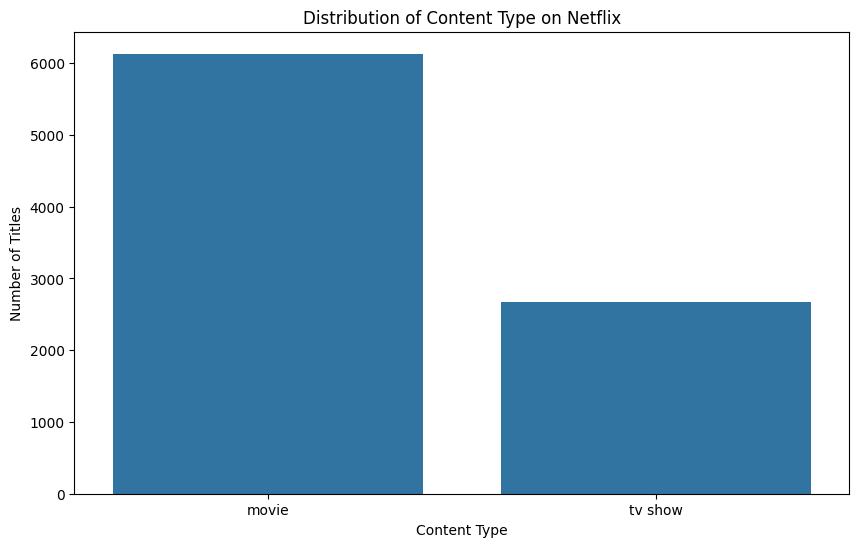

In [43]:
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.show()

This bar chart compares the total number of Movies and TV Shows available on Netflix.
A higher count of movies indicates Netflix’s stronger emphasis on movie-based content, while a larger TV show count would suggest a focus on episodic and long-term viewer engagement.

### Content Growth Over the Years

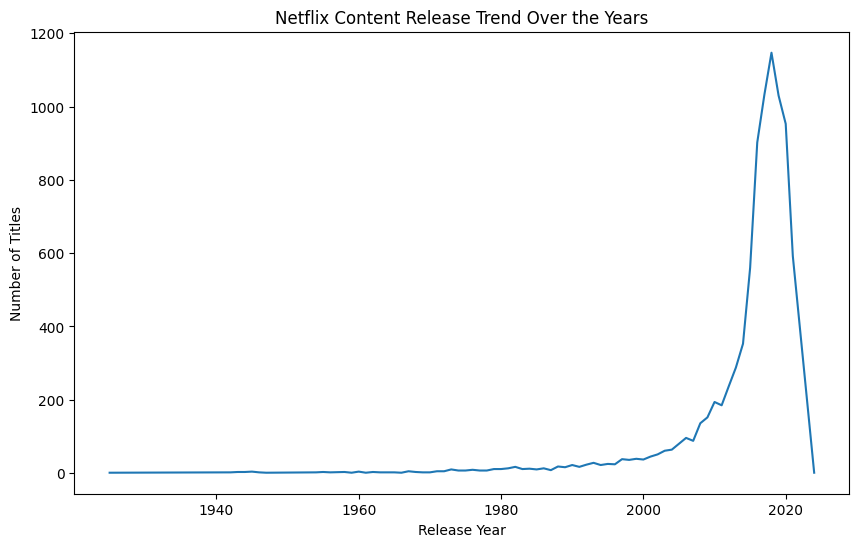

In [33]:
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Netflix Content Release Trend Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

This line chart shows how many titles were released each year.
A sharp rise after certain years reflects Netflix’s rapid expansion, increased investment in original content, and global market penetration.

### Content Added to Netflix Over Time

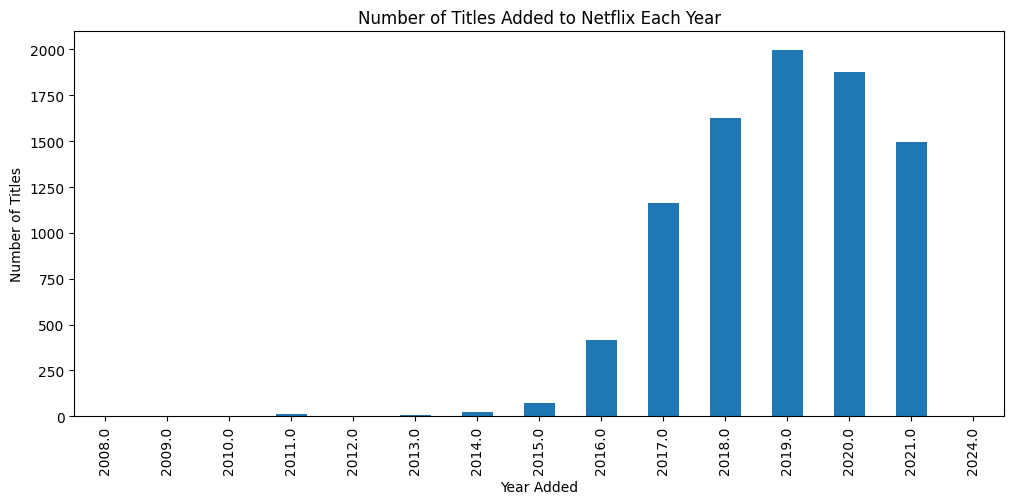

In [34]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title("Number of Titles Added to Netflix Each Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

This visualization shows when content was added to Netflix.
It highlights periods of aggressive content acquisition and reflects Netflix’s scaling strategy over time.

### Top Content Producing Countries

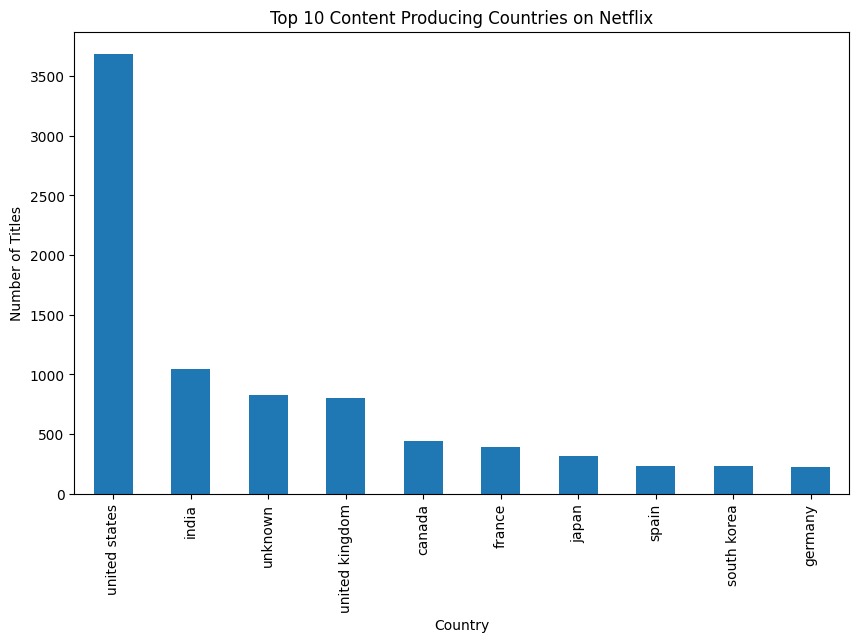

In [36]:
df['country'].explode().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

This bar chart highlights dominant content-producing countries.
A higher contribution from countries like the USA and India indicates Netflix’s focus on large entertainment markets and diverse regional audiences.

### Genre Distribution Analysis

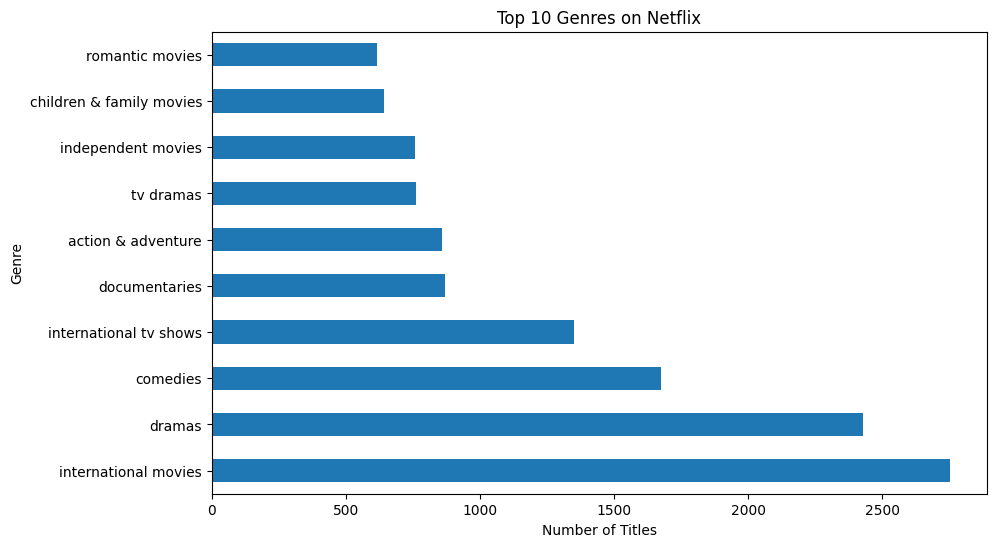

In [37]:
df['listed_in'].explode().value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


Genres reflect audience preferences.
Popular genres suggest Netflix prioritizes content categories with higher engagement and global appeal.

### Ratings Distribution

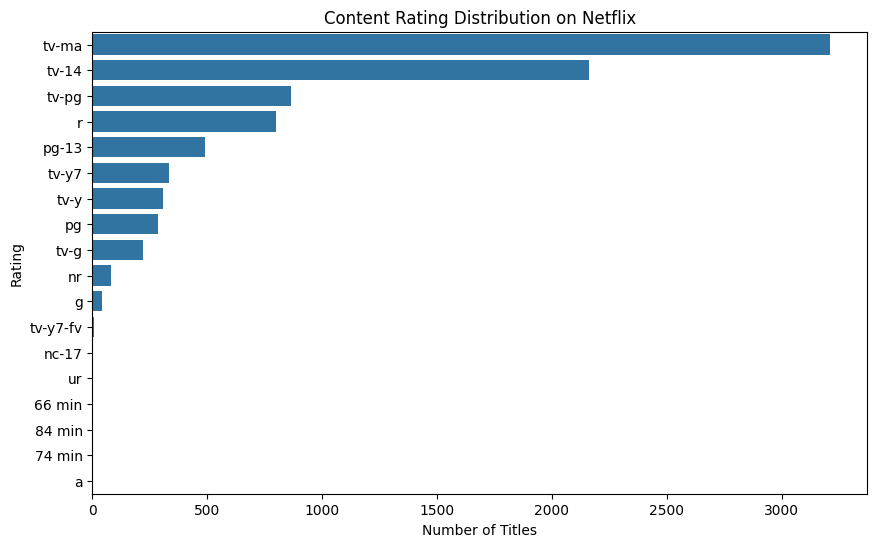

In [40]:
sns.countplot(
    data=df,
    y='rating',
    order=df['rating'].value_counts().index
)
plt.title("Content Rating Distribution on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()

Ratings indicate whether Netflix content targets kids, teens, or mature audiences.
A dominance of mature ratings (TV-MA, TV-14) suggests Netflix primarily caters to adult viewers.

### Duration Analysis (Movies vs TV Shows) 

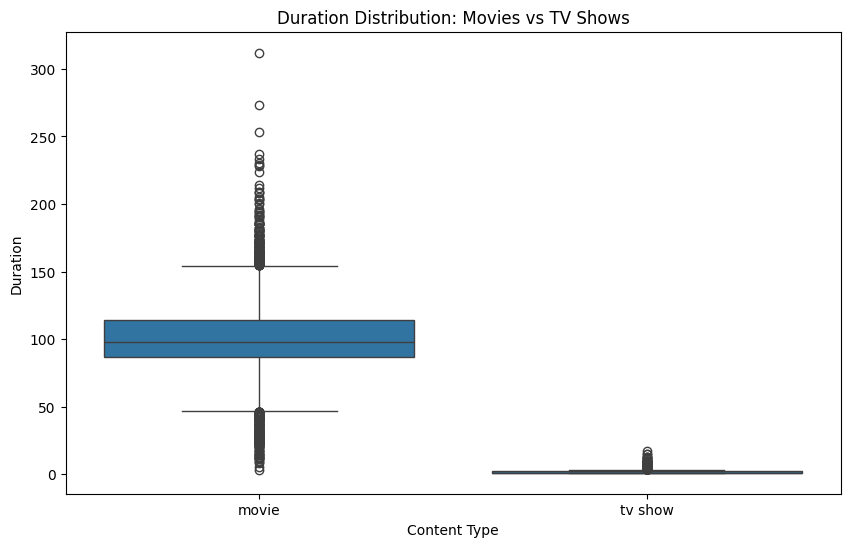

In [45]:
sns.boxplot(data=df, x='type', y='duration_value')
plt.title("Duration Distribution: Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Duration")
plt.show()

This boxplot compares movie lengths and TV show seasons.
It helps identify viewing behavior patterns and Netflix’s preference for short or long-form content.

#  Overall Insight

The exploratory analysis of Netflix’s content library reveals a clear, data-driven picture of the platform’s content strategy, growth trajectory, and audience targeting approach.

Netflix’s catalog is **movie-heavy**, indicating a strategic preference for scalable, cost-efficient content that appeals to a wide audience and supports rapid library expansion. While TV shows are fewer in number, they play a crucial role in sustaining long-term user engagement through episodic and binge-watching behavior.

A sharp increase in content after **2015** reflects Netflix’s aggressive global expansion and transition toward original productions. This period marks Netflix’s evolution from a content distributor to a global content creator, driven by rising subscriber demand and international market penetration.

Regionally, the **United States and India** emerge as dominant content contributors. This highlights Netflix’s balanced strategy of strengthening its presence in established entertainment markets while aggressively investing in high-growth regions with diverse linguistic and cultural audiences.

Genre analysis shows a strong emphasis on **Drama, International Movies, and Comedies**, suggesting Netflix prioritizes emotionally engaging and culturally adaptable storytelling with broad global appeal. This diversity allows Netflix to cater to varying viewer preferences across regions and age groups.

Content ratings are largely skewed toward **TV-MA and TV-14**, indicating Netflix’s primary focus on young adult and mature audiences. This positioning enables creative freedom and differentiates Netflix from traditional broadcast and family-centric streaming platforms.

Overall, the analysis confirms that Netflix’s success is driven by **data-informed content acquisition, global diversification, mature audience targeting, and flexible viewing formats**. These strategic choices collectively enhance user engagement, retention, and competitive advantage in the OTT streaming market.


# Conclusion

The Netflix OTT Content Analysis provides a comprehensive view of the platform’s content strategy, growth patterns, and audience targeting. Key conclusions include:

- **Content Strategy:** Netflix emphasizes movies to scale its library quickly, while TV shows support long-term viewer engagement.
- **Growth & Expansion:** A noticeable surge in content after 2015 reflects Netflix’s global expansion and focus on original productions.
- **Regional Focus:** The United States and India are the largest content contributors, highlighting Netflix’s dual approach of consolidating mature markets while investing in emerging regions.
- **Genre & Audience:** Popular genres like Drama, International Movies, and Comedies cater to diverse audiences, and the predominance of mature ratings (TV-MA, TV-14) targets young adults and mature viewers.
- **Business Impact:** The combination of content diversity, strategic expansion, and audience-focused programming strengthens Netflix’s competitive advantage in the OTT market.

Overall, the insights from this analysis demonstrate how **data-driven content decisions** can guide platform growth, optimize audience engagement, and inform future content acquisition strategies. Further analysis could include user engagement trends, recommendation systems, or sentiment analysis to deepen strategic insights.
